# Infix to Postfix Convertor

**Logic:**
1. Scan the infix from left to right split by space
2. IF the character is an operand, output it into `postfix`
3. ELIF,
	- i is '(' -> i push into stack
	- i is ')' -> pop all elements in stack until encounter '('
4. ELIF (`checkPrecedence(i, stack)`),
	- i has lower or same precedence as stack top element -> pop all elements and push i into stack
    - otherwise -> push i into stack
5. ELSE,
	- pop all elements from stack to `postfix` then push i
5. pop the remaining elements from stack and output them into `postfix`


In [1]:
# Implement Stack class in Python
class Stack:
    def __init__(self):
         self.items = []

    def isEmpty(self):
         return self.items == []

    def push(self, item):
         self.items.append(item)

    def pop(self):
         return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
         return len(self.items)
    
    def top(self):
        return(self.items[-1])


# If the scanned character is digit / character, output it
# P.S. do not use isdigit() otherwise -ve value will return FALSE
def isOperand(operand):
    try:
        operand = int(operand)
        return True
    except ValueError:
        return operand.isalpha()

# Compare the precedence of scanned character and stack.top()
# True: precedence i <= stack top element -> pop all elements and push i into stack
# e.g. i = '-' stack.peek()= '*'
# False: precedence i > stack top element -> push i into stack
# e.g. i = '*' stack.peek()= '+')
def checkPrecedence(i, stack):
    precedence = {'+':1, '-':1, '*':2, '/':2, '^':3}
    if stack.size() != 0 and stack.top()!='(':
        a = precedence[i]
        b = precedence[stack.peek()]
        return True if a <= b else False
    else:
        return False

# if the stack is not empty, pop all elements from the stack until encounter a '('
def popElement(i, stack,postfix):
    while stack.isEmpty() is False:
        if stack.top() == '(':
            stack.pop()
            break # break when ( is pop
        else:
            postfix.append(stack.pop())

# The function to convert infix to postfix and return the postfix result
def doConversion(infix):
    print('infix: {}'.format(infix))
    stack = Stack()
    postfix = []
    
    # Scan the infix expression from left to right
    for i in (infix.split(' ')):
        if isOperand(i):
            postfix.append(i)
        elif i == '(':
            stack.push(i)
        elif i == ')':
            popElement(i, stack,postfix)
        elif checkPrecedence(i, stack) is False:
            stack.push(i)
        else: # checkPrecedence(i, stack) is True
            if stack.isEmpty() is False: 
                postfix.append(stack.pop()) # i <= stack.pop() should only pop out one element
            stack.push(i)
        
    popElement(i, stack,postfix)
            
    # Print the postfix result in one line separated by space
    print('postfix:', end=" ")
    for i in postfix:
        print(i, end =" ")
    print('\n')

# The main function to define the precedence and request an infix input
def main():
    infix = input("What do you want to do?(+, -, *, or /):")
    doConversion(infix)

In [13]:
main()

What do you want to do?(+, -, *, or /):10 + 3 * 5 / ( 16 - 4 )
infix: 10 + 3 * 5 / ( 16 - 4 )
postfix: 10 3 5 * 16 4 - / + 



### Test case


In [6]:
infix = [
    '12 + 23',
    '34 * 56',
    '1 + 2 * 3', 
    '2 - 3 / 4 ^ 5',
    '( 1 + 2 ) * 3',
    'a - b / x',
    'a + -2 * b',
    '1 * 2 + 3 - ( 4 * 5 + 6 ) + 7',
    '1 + 2 * 3 - ( 4 * 5 ) + 6',
    'x ^ y / ( 5 * z ) + 10'
]

for i in infix:
    doConversion(i)

infix: 12 + 23
postfix: 12 23 + 

infix: 34 * 56
postfix: 34 56 * 

infix: 1 + 2 * 3
postfix: 1 2 3 * + 

infix: 2 - 3 / 4 ^ 5
postfix: 2 3 4 5 ^ / - 

infix: ( 1 + 2 ) * 3
postfix: 1 2 + 3 * 

infix: a - b / x
postfix: a b x / - 

infix: a + -2 * b
postfix: a -2 b * + 

infix: 1 * 2 + 3 - ( 4 * 5 + 6 ) + 7
postfix: 1 2 * 3 + 4 5 * 6 + - 7 + 

infix: 1 + 2 * 3 - ( 4 * 5 ) + 6
postfix: 1 2 3 * + 4 5 * - 6 + 

infix: x ^ y / ( 5 * z ) + 10
postfix: x y ^ 5 z * / 10 + 



In [6]:
infix = [
    '12 + 23',
    '34 * 56',
    '1 + 2 * 3', 
    '2 - 3 / 4 ^ 5',
    '( 1 + 2 ) * 3',
    'a - b / x',
    'a + -2 * b',
    '1 * 2 + 3 - ( 4 * 5 + 6 ) + 7',
    '1 + 2 * 3 - ( 4 * 5 ) + 6',
    'x ^ y / ( 5 * z ) + 10',
    '10 + 3 * 5 / ( 16 - 4 )',
    '10 ^ ( 6 + 3 ) * 5 / ( 16 - 4 )'
]

for i in infix:
    doConversion(i)

infix: 12 + 23
postfix: 12 23 + 

infix: 34 * 56
postfix: 34 56 * 

infix: 1 + 2 * 3
postfix: 1 2 3 * + 

infix: 2 - 3 / 4 ^ 5
postfix: 2 3 4 5 ^ / - 

infix: ( 1 + 2 ) * 3
postfix: 1 2 + 3 * 

infix: a - b / x
postfix: a b x / - 

infix: a + -2 * b
postfix: a -2 b * + 

infix: 1 * 2 + 3 - ( 4 * 5 + 6 ) + 7
postfix: 1 2 * 3 + 4 5 * 6 + - 7 + 

infix: 1 + 2 * 3 - ( 4 * 5 ) + 6
postfix: 1 2 3 * 4 5 * - 6 + + 

infix: x ^ y / ( 5 * z ) + 10
postfix: x y ^ 5 z * / 10 + 

infix: 10 + 3 * 5 / ( 16 - 4 )
postfix: 10 3 5 * 16 4 - / + 

infix: 10 ^ ( 6 + 3 ) * 5 / ( 16 - 4 )
postfix: 10 6 3 + ^ 5 * 16 4 - / 



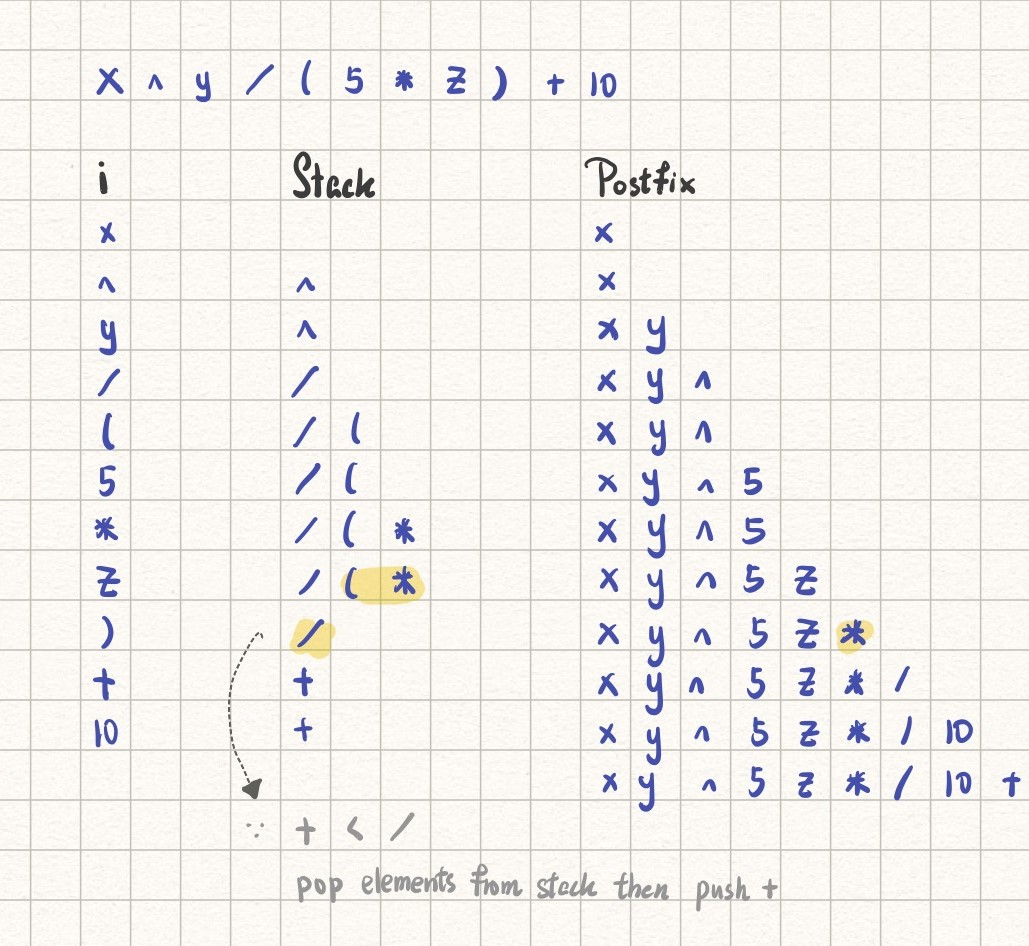